In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import delayed, Parallel

In [31]:
class paths:
    TRAIN = './data/train.csv'
    TEST = './data/test.csv'

# Features

In [32]:
df = pd.read_csv(paths.TRAIN)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


In [33]:
y_cols = df.columns[-7:]
feature_df = df.drop(columns=y_cols)
y_df = df[y_cols]

In [34]:
feature_df['Height'] = np.abs(feature_df['Y_Maximum'] - feature_df['Y_Minimum'])
feature_df['Width'] = np.abs(feature_df['X_Maximum'] - feature_df['X_Minimum'])
feature_df.drop(columns=['X_Maximum', 'X_Minimum', 'Y_Maximum', 'Y_Minimum', 
                         'id', 'SigmoidOfAreas', 'Pixels_Areas'], inplace=True)
feature_df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Perimeter,19219.0,95.654665,177.821382,2.0000,15.00000,25.0000,64.0000,7.553000e+03
Y_Perimeter,19219.0,64.124096,101.054178,1.0000,14.00000,23.0000,61.0000,9.030000e+02
Sum_of_Luminosity,19219.0,191846.678235,442024.694057,250.0000,9848.00000,18238.0000,67978.0000,1.159141e+07
Minimum_of_Luminosity,19219.0,84.808419,28.800344,0.0000,70.00000,90.0000,105.0000,1.960000e+02
Maximum_of_Luminosity,19219.0,128.647380,14.196976,39.0000,124.00000,127.0000,135.0000,2.530000e+02
Length_of_Conveyer,19219.0,1459.350747,145.568687,1227.0000,1358.00000,1364.0000,1652.0000,1.794000e+03
TypeOfSteel_A300,19219.0,0.402674,0.490449,0.0000,0.00000,0.0000,1.0000,1.000000e+00
TypeOfSteel_A400,19219.0,0.596337,0.490644,0.0000,0.00000,1.0000,1.0000,1.000000e+00
Steel_Plate_Thickness,19219.0,76.213122,53.931960,40.0000,40.00000,69.0000,80.0000,3.000000e+02
Edges_Index,19219.0,0.352939,0.318976,0.0000,0.05860,0.2385,0.6561,9.952000e-01


For a tree-based model, transformations of numerical columns that preserve the model do nothing for us. So, we drop `SigmoidOfAreas` and `Pixels_Areas` in favor of `LogOfAreas` for its superior distribution.

I'm curious about the meanings of the geometric information. 

`Orientation_Index` ranges from around -1 and 1, so it's likely the cosine or sine of some angle. This angle is almost certainly the angle of the picture being taken, an important corrective variable we'll experiment with during feature engineering.

`X_Perimeter`, `Outside_X_Index`, `Edges_X_Index`, `Log_X_Index`, and `Width` seem like synonyms, so we will run a quick visualization here to see how they relate.

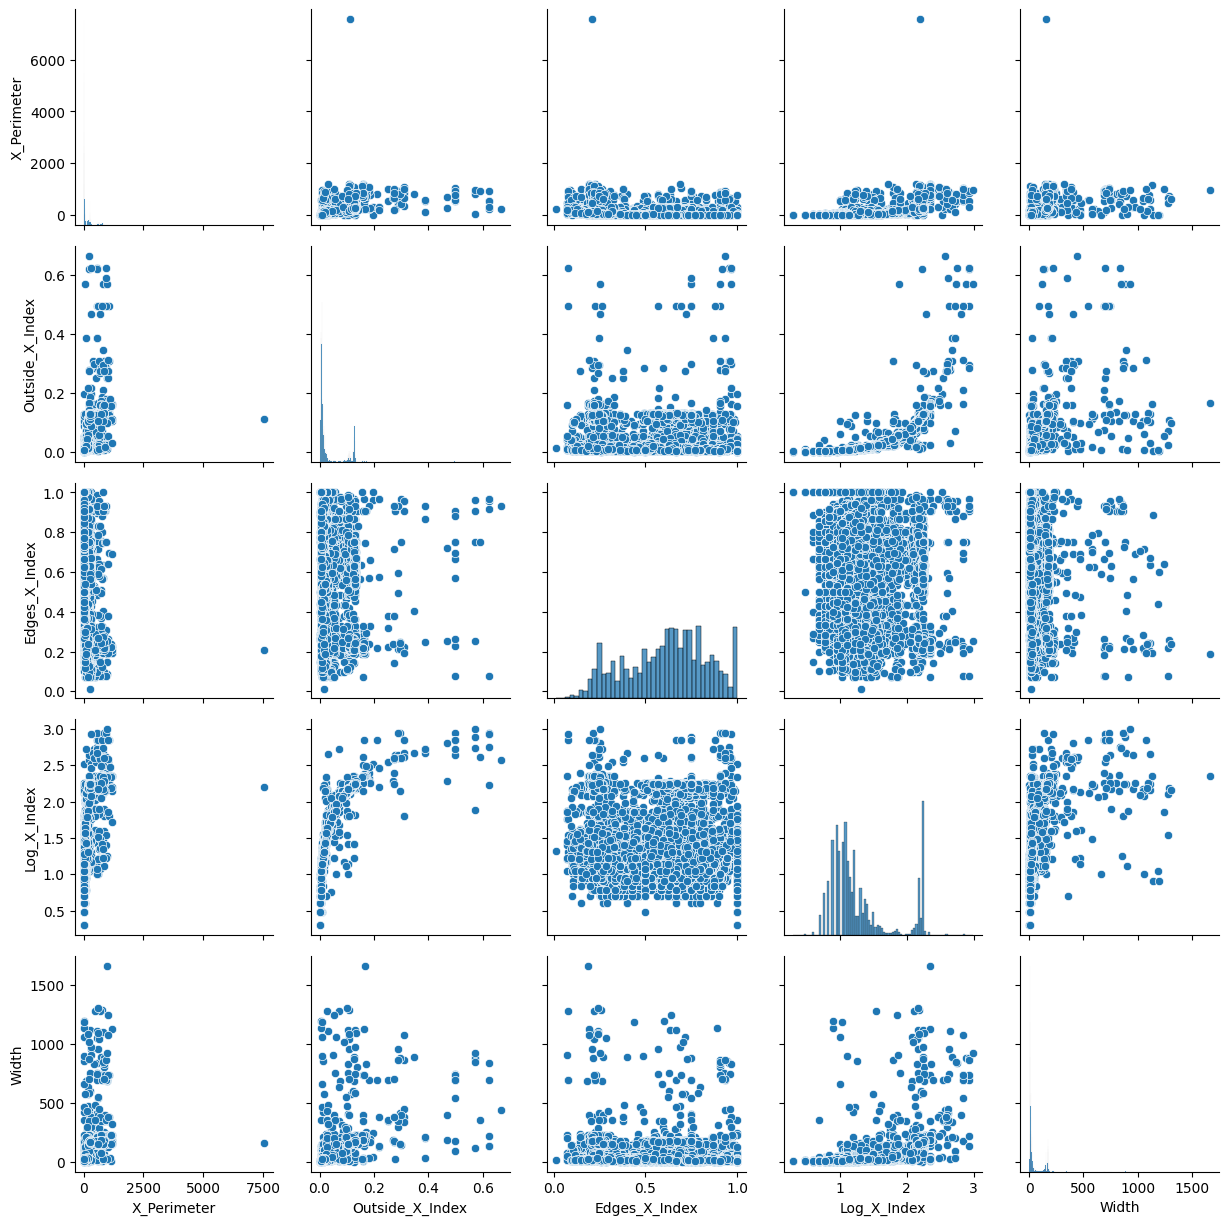

In [35]:
X_feats = feature_df[['X_Perimeter', 'Outside_X_Index', 'Edges_X_Index', 'Log_X_Index', 'Width']]

graph = sns.PairGrid(X_feats)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot)

Let's investigate the strange `X_Perimeter` outlier.

In [36]:
perimeter_outlier = df.loc[df['X_Perimeter'] > 2500]
display(perimeter_outlier)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
10907,10907,41,197,1831860,1832017,10880,7553,409,1245114,40,...,0.1171,-0.1059,1.0,0,0,1,0,0,0,0


This outlier must be a fluke. Let's just drop it from the dataset.

In [37]:
X_feats.drop(labels=10907, inplace=True)

C:\Users\ttfee\AppData\Local\Temp\ipykernel_21600\1575770979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feats.drop(labels=10907, inplace=True)


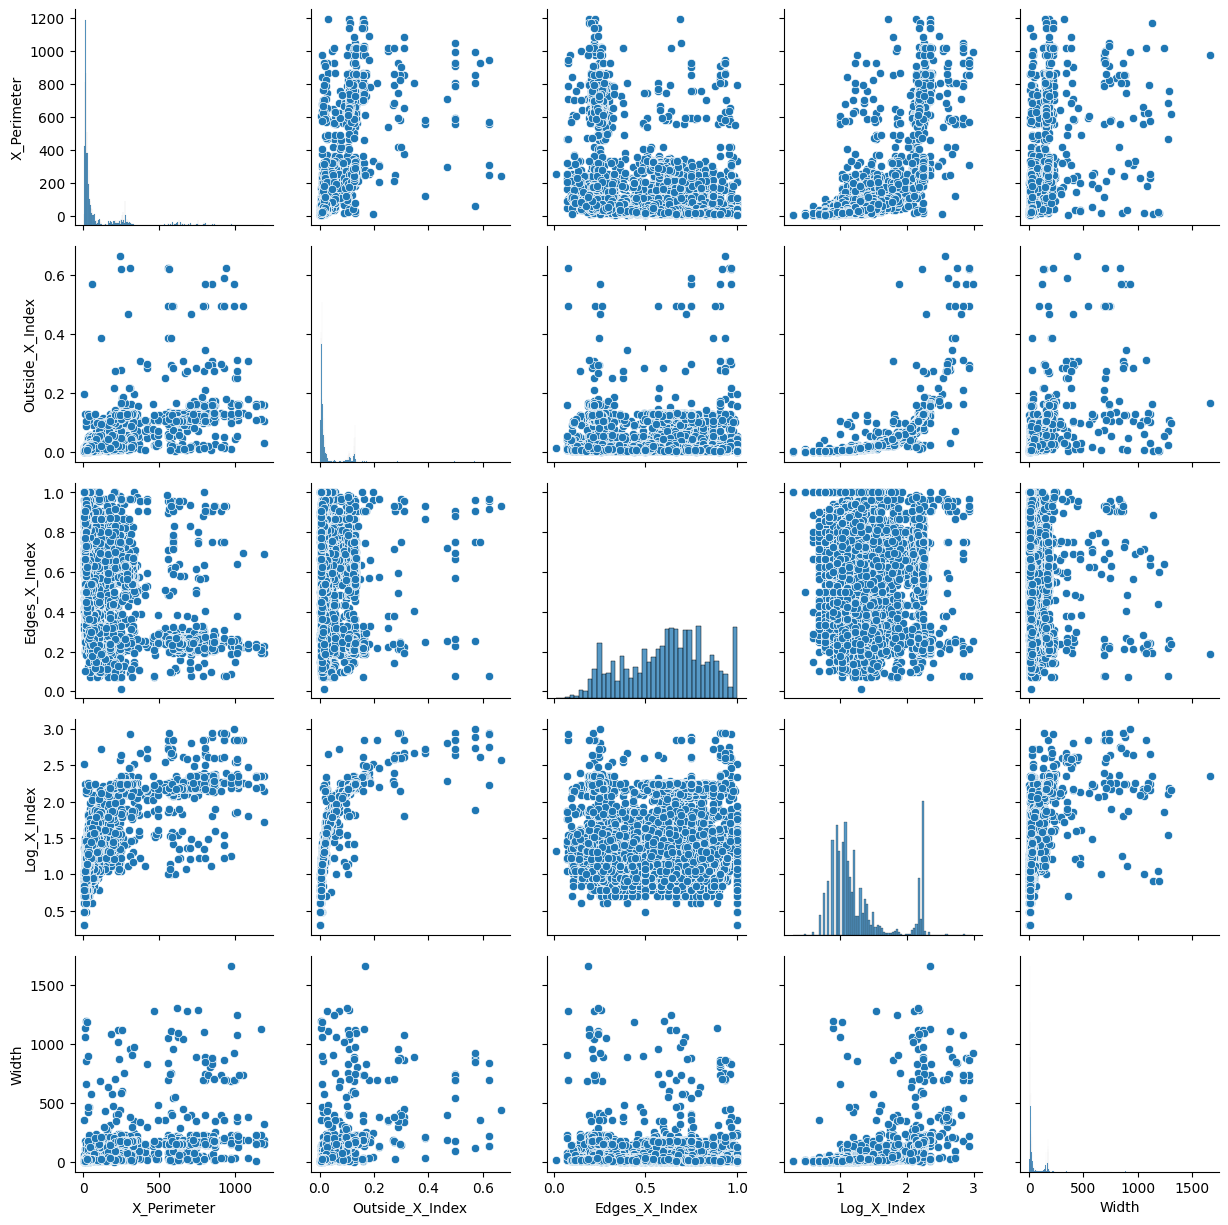

In [38]:
graph = sns.PairGrid(X_feats)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot)

The logarithmic relationship in `Log_X_Index` vs `Outside_X_Index` compels me to "unlog" `Log_X_Index`. However, judging from distributions alone, it seems like we'd benefit more from a logarithmic `Outside_X_Index`. Let's do the same for `Width` and `X_Perimeter` since their distributions suffer the same extreme skew.

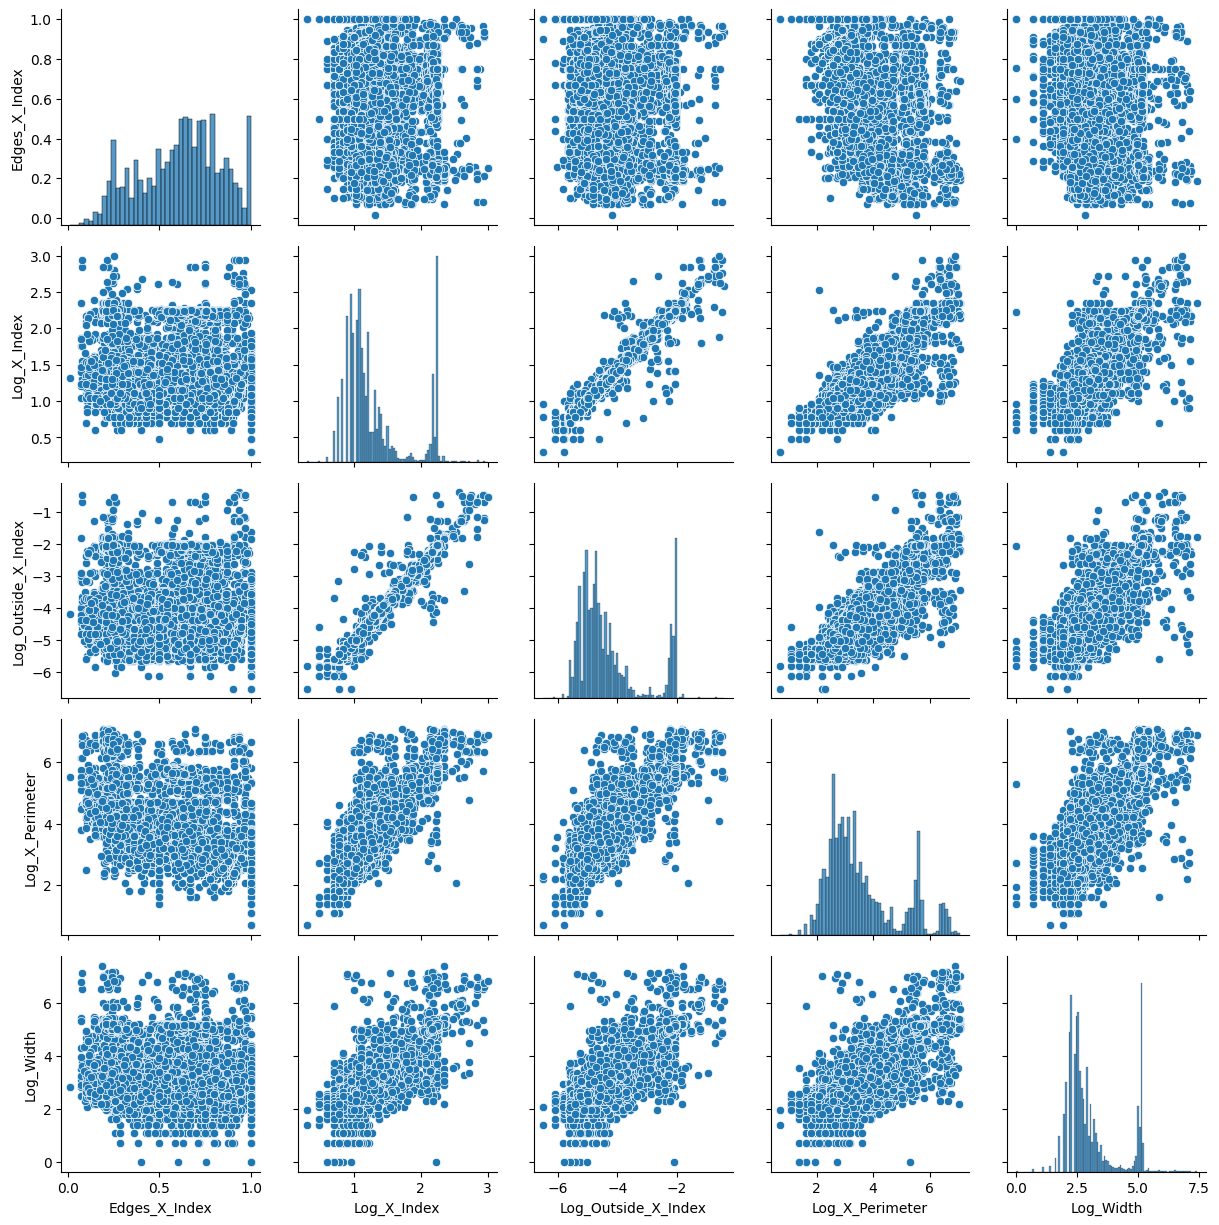

In [47]:
eps1 = 1e-6
eps2 = 1
temp_df = pd.DataFrame()
temp_df[['Edges_X_Index', 'Log_X_Index']
        ] = X_feats[['Edges_X_Index','Log_X_Index']]
temp_df[['Log_Outside_X_Index', 'Log_X_Perimeter'
         ]] = np.log(X_feats[['Outside_X_Index', 'X_Perimeter']] + eps1)
temp_df['Log_Width'] = np.log(X_feats['Width'] + eps2)
graph = sns.PairGrid(temp_df)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot)

`Log_X_Index` and `Log_Outside_X_Index` are very strongly correlated.

In [51]:
def norm(arr):
    return (np.array(arr) - np.mean(arr)) / np.std(arr)

def correlation(arr1, arr2):
    a1, a2 = norm(arr1), norm(arr2)
    return np.mean(a1 * a2)

In [52]:
corr = correlation(temp_df['Log_X_Index'], temp_df['Log_Outside_X_Index'])
print(f'Correlation between Log_X_Index and Log_Outside_X_Index: {corr}')

Correlation between Log_X_Index and Log_Outside_X_Index: 0.9924339222853408


We will drop `Log_X_Index` and keep `Log_Outside_X_Index` for its distribution.

At this point, we should score our data with dropped columns against baseline.